http://www.science.smith.edu/~jcrouser/SDS293/labs/lab16-py.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
np.random.seed(123)
NumObs = 60
X = np.random.randn(NumObs,2)

In [19]:
X[0:30, 0] = X[0:30, 0] + 3
X[0:30, 1] = X[0:30, 1] - 4
# to get 3 groups....
X[0:15, 0] = X[0:15, 0] + 4
X[0:15, 1] = X[0:15, 1] + 4

Text(0,0.5,'X1')

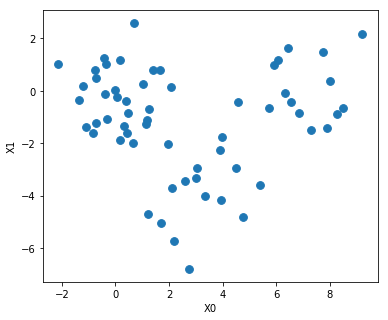

In [20]:
f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=NumObs) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 123).fit(X)

The cluster assignments of the 50 observations are contained in kmeans.labels_:

In [22]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


The K-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to Kmeans(). We can plot the data, with each observation colored according to its cluster assignment:

In [25]:
kmeans.cluster_centers_

array([[ 0.09428071, -0.21784033],
       [ 7.02341338,  0.06601456],
       [ 3.14763222, -3.82394953]])

Text(0,0.5,'X1')

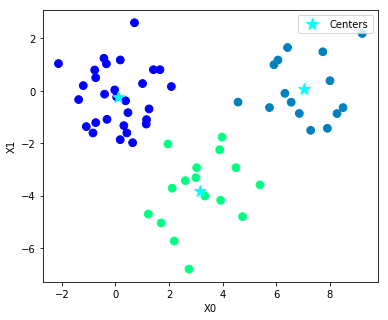

In [28]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = NumObs, c = kmeans.labels_, cmap = plt.cm.winter) 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            marker = '*', 
            s = 150,
            color = 'cyan', 
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

In [ ]:
kmeans_3_clusters = KMeans(n_clusters = 3, random_state = 123)
kmeans_3_clusters.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=NumObs, c=kmeans_3_clusters.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans_3_clusters.cluster_centers_[:, 0], kmeans_3_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

Text(0,0.5,'X1')

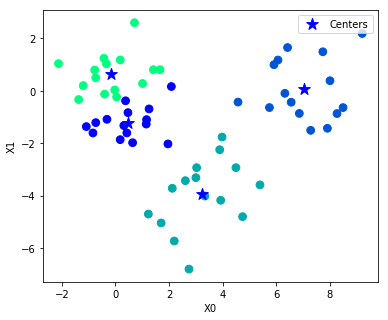

In [32]:
kmeans_4_clusters = KMeans(n_clusters = 4, random_state = 123)
kmeans_4_clusters.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=NumObs, c=kmeans_4_clusters.labels_, cmap=plt.cm.winter) 
plt.scatter(kmeans_4_clusters.cluster_centers_[:, 0], kmeans_4_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

To run the Kmeans() function in python with multiple initial cluster assignments, we use the n_init argument (default: 10). If a value of n_init greater than one is used, then K-means clustering will be performed using multiple random assignments, and the Kmeans() function will report only the best results. Here we compare using n_init = 1:

In [36]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 1, random_state = 123).fit(X)
km_out_single_run.inertia_

153.25273393913386

to n_init = 20:

In [35]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 20, random_state = 123).fit(X)
km_out_single_run.inertia_

153.25273393913386

Note that .inertia_ is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering.

It is generally recommended to always run K-means clustering with a large value of n_init, such as 20 or 50 to avoid getting stuck in an undesirable local optimum.

When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the random_state parameter. This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.

### What’s the best value of K?

So what is the right value of k? Like with PCA, there is no perfect answer towards choosing how many dimensions the subspace should be. When k is not given to you, typically, you would run with many different values of k. Then create a plot of cost(S, X) as a function of k.  

https://learn.scientificprogramming.io/python-k-means-data-clustering-and-finding-of-the-best-k-485f66297c06

inertia_ : float  
    - Sum of squared distances of samples to their closest cluster center.

* Lets try it...

In [44]:
inertias = []
test_ks = [1,2,3,4,5]
for n_clusters in test_ks:
    inertia = KMeans(n_clusters = n_clusters, n_init = 1, random_state = 123).fit(X).inertia_
    inertias.append(inertia)

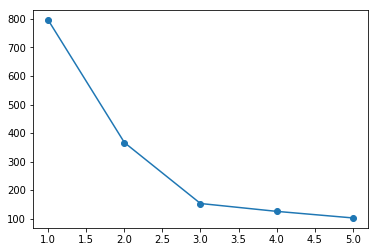

In [51]:
pd.Series(index=test_ks, data=inertias).plot(marker='o')